**This is Project-5 i.e., Deep Learning (CNN) - May 2021 ADSP Cohort.**

# **Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition**

# Marks: 30

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [1]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/gdrive') #update drive to gdrive

Mounted at /content/gdrive


## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [3]:
print(tf.__version__)

2.5.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required
#h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')
h5f = h5py.File('/content/gdrive/My Drive/Colab Notebooks/Project_5_Deep_Learning/SVHN_single_grey1.h5', 'r') #updated drive to gdrive and MyDrive to My Drive

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

#### **Question 1: Complete the below code to visualize the first 10 images from the training data (1 Mark)**

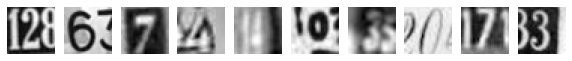

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [7]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [9]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **Question 2: One-hot encode the labels in the target variable y_train and y_test (2 Marks)**

In [11]:
#Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [12]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 3: Build and train a CNN model as per the above mentioned architecture (10 Marks)**

In [13]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 0.001)
    
    #compile the model
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])
    
    return model

In [14]:
#Build the model
model_1 = cnn_model_1()

In [15]:
#Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [16]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
1050/1050 [==============================] - 19s 3ms/step - loss: 1.1813 - accuracy: 0.6084 - val_loss: 0.6497 - val_accuracy: 0.8104
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5305 - accuracy: 0.8482 - val_loss: 0.5323 - val_accuracy: 0.8481
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4403 - accuracy: 0.8714 - val_loss: 0.5120 - val_accuracy: 0.8549
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3852 - accuracy: 0.8876 - val_loss: 0.4526 - val_accuracy: 0.8707
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3410 - accuracy: 0.8979 - val_loss: 0.4809 - val_accuracy: 0.8613
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2992 - accuracy: 0.9112 - val_loss: 0.4670 - val_accuracy: 0.8701
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2716 - accuracy: 0.9187 - val_loss: 0.4800 - val_accuracy

### **Plotting the validation and training accuracies**

#### **Question 4: Write your observations on the below plot (2 Marks)**

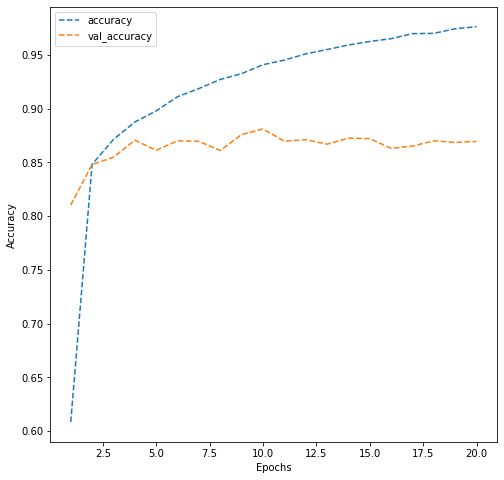

In [17]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:__________**

1. In this section (model), we have used 20 epochs. The "number of epochs" is a hyperparameter that helps define the number times the learning algorithm will work through the entire training dataset i.e., each sample in the training dataset has had an opportunity to update the internal model parameters.

2. The "loss" for training dataset is in the range of: 1.1813 to 0.0729. The "accuracy" for training dataset is in the range of: 0.6084 to 0.9763 (60.84% to 97.63%)

3. The "loss" for validation dataset is in the range of: 0.6497 to 0.8026 The "accuracy" for validation dataset is in the range of: 0.8104 to 0.8695 (81.04% to 86.95%).

4. We notice that the training accuracy starts a little above 0.60 or 60% and goes all the way by raising up continuously until 97.63%. At the same time, we notice that the validation accuracy starts a little above 0.80, but hovers around 0.85 or 85%. 

5. Validation accuracy will be usually less than training accuracy because training data is something with which the model is already familiar with and validation data is a collection of new data points which is new to the model. This means the model is an excellent predictor with all kinds of boundary cases consideration.

6. We notice a few ridges in the case of validation accuracy curve as the model may be trying to handle minima and noise to fit the best model.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [18]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [19]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 5: Build and train the second CNN model as per the above mentioned architecture (10 Marks)**

In [20]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    
    return model

In [21]:
# Build the model
model_2 = cnn_model_2()

In [22]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [23]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
263/263 [==============================] - 3s 8ms/step - loss: 1.4793 - accuracy: 0.4965 - val_loss: 2.4243 - val_accuracy: 0.1757
Epoch 2/30
263/263 [==============================] - 2s 7ms/step - loss: 0.7042 - accuracy: 0.7819 - val_loss: 0.5690 - val_accuracy: 0.8310
Epoch 3/30
263/263 [==============================] - 2s 7ms/step - loss: 0.5642 - accuracy: 0.8256 - val_loss: 0.5091 - val_accuracy: 0.8495
Epoch 4/30
263/263 [==============================] - 2s 7ms/step - loss: 0.5037 - accuracy: 0.8457 - val_loss: 0.4834 - val_accuracy: 0.8554
Epoch 5/30
263/263 [==============================] - 2s 7ms/step - loss: 0.4513 - accuracy: 0.8636 - val_loss: 0.4095 - val_accuracy: 0.8832
Epoch 6/30
263/263 [==============================] - 2s 7ms/step - loss: 0.4149 - accuracy: 0.8723 - val_loss: 0.5404 - val_accuracy: 0.8460
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 0.3808 - accuracy: 0.8824 - val_loss: 0.3608 - val_accuracy: 0.9025
Epoch 

### **Plotting the validation and training accuracies**

#### **Question 6: Write your observations on the below plot (2 Marks)**

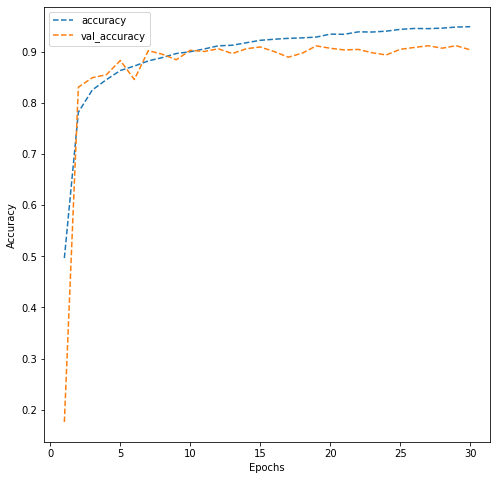

In [24]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:________**

1. In this section (model), we have used 30 epochs. The "number of epochs" is a hyperparameter that helps define the number times the learning algorithm will work through the entire training dataset i.e., each sample in the training dataset has had an opportunity to update the internal model parameters.

2. The "loss" for training dataset is in the range of: 1.4793 to 0.1508. The "accuracy" for training dataset is in the range of: 0.4965 to 0.9493 (49.65% to 94.93%)

3. The "loss" for validation dataset is in the range of: 2.4243 to 0.5375. The "accuracy" for validation dataset is in the range of: 0.1757 to 0.9040 (17.57% to 90.40%).

4. We notice that the training accuracy starts around 0.50 or 50% and goes all the way by raising up continuously with a slow movement until 94.93%. 

5. At the same time, we notice that the validation accuracy started way below at less than 0.20 and after it reaches above 0.80 it goes through some ridges but stays at the same level. It hovers in the same range with ridges dying down as we hit epoch#30. We notice a few ridges in the case of validation accuracy curve as the model may be trying to handle minima and noise to fit the best model.

6. Validation accuracy will be usually less than training accuracy because training data is something with which the model is already familiar with and validation data is a collection of new data points which is new to the model. This means the model is an excellent predictor with all kinds of boundary cases consideration.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using classification report and the confusion matrix
- Final observations from the obtained results

#### **Question 7: Make predictions on the test data using the second model (1 Mark)**

In [25]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [26]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 8: Write your final observations on the performance of the model on the test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1814
           1       0.91      0.90      0.90      1828
           2       0.95      0.89      0.92      1803
           3       0.93      0.84      0.89      1719
           4       0.92      0.92      0.92      1812
           5       0.91      0.90      0.91      1768
           6       0.88      0.91      0.89      1832
           7       0.89      0.94      0.92      1808
           8       0.90      0.88      0.89      1812
           9       0.88      0.90      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.91      0.90      0.90     18000
weighted avg       0.91      0.90      0.90     18000



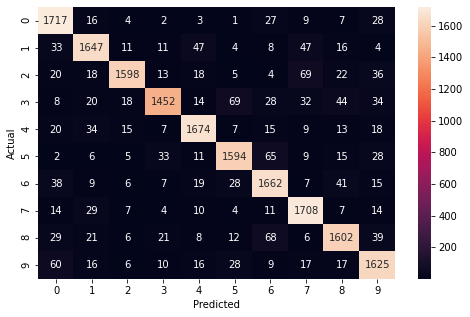

In [27]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:_________**

1. The model's accuracy is 0.90 and this implies that the model is giving about 90% accuracy on the test data which is almost same to the value that we've obtained on the validation model (0.9040 or 90.40%) at Epoch-30 in the run which was immediately above this. The accuracy values are comparable and this implies that the model is giving a generalized performance.

2. The recall has a pretty tight range (0.84 for object belonging to class-3 to 0.95 for object belonging to class-0). This implies that the CNN model compared to the earlier ANN model was good at identifying objects as belonging to different classes with some level of performance. 

3. The application of the additional layers of convolution filters with activation functions has helped in working with the clumsiness and noise inherently noticed in the images within the dataset. It is most important thing for us to remember as modelers is to understand that the StreetView Housing Number Digits were collected over many years and for different places and regions.

4. The precision was high for object belonging to class-2 (0.95) and lowest or objects belonging to classes - 0, 6, and 9. 

5. A very slight confusion exisits between objects belonging to classes-9 and 0; 3 and 5; and 1 and 7 & 2 and 7. This can be addressed in the future by taking into account adding pre-trained models.

6. We can definitely state that the CNN model is performing better than the ANN model by reviewing the precision, recall, and accuracy metrics. 

In [ ]:
# Google Co Lab didn't have the option to download the .ipynb script as a html file
# The following script helps in download the .ipynb file first and then reimport within the environment for creating a .html file
%%shell
jupyter nbconvert --to html /content/CNN.ipynb